In [1]:
import pandas as pd

# Load the dataset using semicolon as the delimiter
file_path = 'business-licences.csv'
business_data_cleaned = pd.read_csv(file_path, delimiter=';')

# Display the first few rows of the cleaned dataset to understand its structure
business_data_cleaned.head()


,FOLDERYEAR,LicenceRSN,LicenceNumber,LicenceRevisionNumber,BusinessName,BusinessTradeName,Status,IssuedDate,ExpiredDate,BusinessType,...,City,Province,Country,PostalCode,LocalArea,NumberofEmployees,FeePaid,ExtractDate,Geom,geo_point_2d
0,24,4503098,24-122152,10,Linh My Huynh (Linh Huynh),X-Treme Image,Issued,2023-11-29T11:48:49+05:30,2024-12-31,Beauty Services,...,Vancouver,BC,CA,V5L 5G4,Grandview-Woodland,4.0,NaN,2024-09-10T12:39:35+05:30,"{""coordinates"": [-123.057024951659, 49.2732673...","49.2732673244212, -123.057024951659"
1,24,4503099,24-122153,10,Matt House Phenomenon Holding Ltd,88 Beauty Salon,Issued,2023-12-02T01:02:27+05:30,2024-12-31,Beauty Services,...,Vancouver,BC,CA,V6B 1M7,Downtown,6.0,NaN,2024-09-10T12:39:35+05:30,"{""coordinates"": [-123.115629922714, 49.2758281...","49.2758281684172, -123.115629922714"
2,24,4503101,24-122155,10,Sandeep Sanan & Suman Kumari Sanan,Grace Beauty Salon & Spa,Issued,2023-11-29T09:59:17+05:30,2024-12-31,Beauty Services,...,Vancouver,BC,CA,V5X 3X2,Sunset,3.0,NaN,2024-09-10T12:39:35+05:30,"{""coordinates"": [-123.101297003238, 49.2238892...","49.2238892646086, -123.101297003238"
3,24,4503102,24-122156,10,Spring Hair Design Inc,NaN,Issued,2023-11-22T23:18:41+05:30,2024-12-31,Beauty Services,...,Vancouver,BC,CA,V6R 2H7,West Point Grey,2.0,NaN,2024-09-10T12:39:35+05:30,"{""coordinates"": [-123.205599542797, 49.2634745...","49.2634745977996, -123.205599542797"
4,24,4503112,24-122166,10,Boccoli Ltd,NaN,Issued,2023-12-22T00:16:26+05:30,2024-12-31,Beauty Services,...,Vancouver,BC,CA,V5L 4T6,Hastings-Sunrise,9.0,NaN,2024-09-10T12:39:35+05:30,"{""coordinates"": [-123.056152403443, 49.2728373...","49.272837358914, -123.056152403443"


In [2]:
# Check for missing values in the dataset
missing_values = business_data_cleaned.isnull().sum()

# Display the columns with missing values and the count
missing_values[missing_values > 0]


,0
BusinessName,4180
BusinessTradeName,37826
IssuedDate,3851
ExpiredDate,3843
BusinessSubType,54720
Unit,45608
UnitType,45685
House,26911
Street,26907
City,12


In [3]:
# Drop rows with any missing values
business_data_dropped_na = business_data_cleaned.dropna()

# Display the shape of the new dataset to see how many rows remain
business_data_dropped_na.shape


(69, 25)

In [4]:
# Select relevant columns for business analysis
columns_of_interest = ['BusinessName', 'BusinessTradeName', 'BusinessType', 'IssuedDate', 'ExpiredDate', 'City', 'Province', 'PostalCode', 'LocalArea', 'NumberofEmployees']

# Create a new DataFrame with only the selected columns
business_data_filtered = business_data_dropped_na[columns_of_interest]

# Display the first few rows of the filtered dataset
business_data_filtered.head()


,BusinessName,BusinessTradeName,BusinessType,IssuedDate,ExpiredDate,City,Province,PostalCode,LocalArea,NumberofEmployees
7087,BRJ Investments Inc,Mansion Night Club,Temp Liquor Licence Amendment,2024-03-09T00:30:42+05:30,2024-12-31,Vancouver,BC,V6E 0C6,Downtown,50.0
12796,The Movement Studio Pilates & Gyrotonic Inc,Fitness Professional,Fitness Centre,2024-02-25T08:08:49+05:30,2024-12-31,Vancouver,BC,V6K 4S2,Kitsilano,1.0
12801,Vancouver Hot Yoga 101 Inc,Bikram Yoga Vancouver,Fitness Centre,2023-11-27T06:24:41+05:30,2024-12-31,Vancouver,BC,V5Z 3X7,Fairview,15.0
12803,639200 BC Ltd,Studeo 55,Fitness Centre,2024-02-15T22:13:46+05:30,2024-12-31,Vancouver,BC,V6Z 2G3,Downtown,20.0
12813,Equinox 1111 West Georgia St Co,EQUINOX,Fitness Centre,2023-12-15T04:40:19+05:30,2024-12-31,Vancouver,BC,V6E 3G4,Downtown,40.0


In [5]:
# Convert 'IssuedDate' and 'ExpiredDate' to datetime format
business_data_filtered['IssuedDate'] = pd.to_datetime(business_data_filtered['IssuedDate'])
business_data_filtered['ExpiredDate'] = pd.to_datetime(business_data_filtered['ExpiredDate'])

# Check if the conversion was successful
business_data_filtered.dtypes


<ipython-input-5-b2318db98025>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_data_filtered['IssuedDate'] = pd.to_datetime(business_data_filtered['IssuedDate'])
<ipython-input-5-b2318db98025>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_data_filtered['ExpiredDate'] = pd.to_datetime(business_data_filtered['ExpiredDate'])


,0
BusinessName,object
BusinessTradeName,object
BusinessType,object
IssuedDate,"datetime64[ns, UTC+05:30]"
ExpiredDate,datetime64[ns]
City,object
Province,object
PostalCode,object
LocalArea,object
NumberofEmployees,float64


In [6]:
# Generate summary statistics for numerical columns
business_data_filtered.describe()


,ExpiredDate,NumberofEmployees
count,69,69.000000
mean,2024-12-07 22:15:39.130434816,15.014493
min,2024-02-18 00:00:00,0.000000
25%,2024-12-31 00:00:00,4.000000
50%,2024-12-31 00:00:00,10.000000
75%,2024-12-31 00:00:00,17.000000
max,2024-12-31 00:00:00,120.000000
std,NaN,18.207539


In [7]:
# Count the number of businesses by their type
business_count_by_type = business_data_filtered['BusinessType'].value_counts()

# Display the count of businesses by type
business_count_by_type


,count
BusinessType,
Fitness Centre,42
Temp Liquor Licence Amendment,13
Restaurant,6
Beauty Services,5
Special Events,2
Liquor Establishment,1


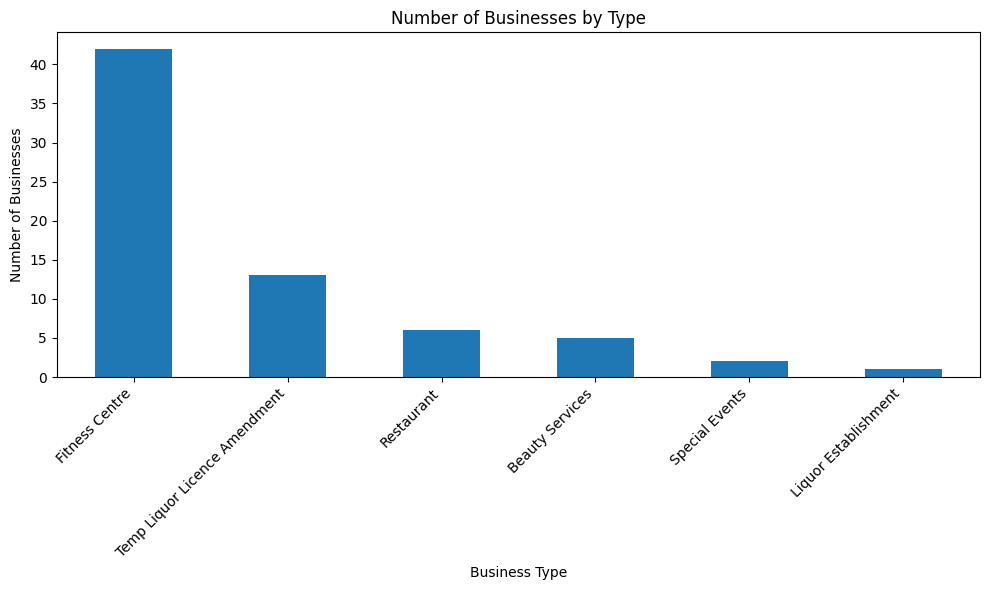

In [8]:
import matplotlib.pyplot as plt

# Plot the distribution of businesses by their type
plt.figure(figsize=(10, 6))
business_count_by_type.plot(kind='bar')
plt.title('Number of Businesses by Type')
plt.xlabel('Business Type')
plt.ylabel('Number of Businesses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


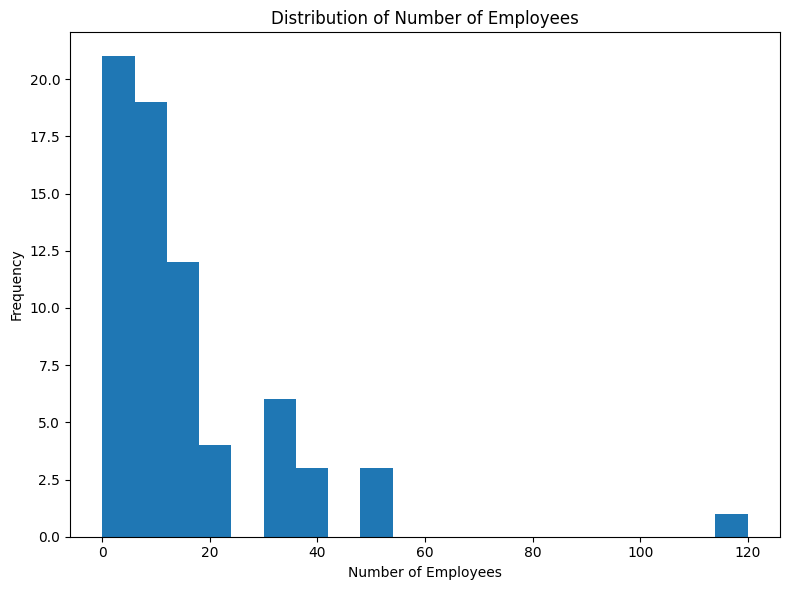

In [9]:
# Plot the distribution of the number of employees
plt.figure(figsize=(8, 6))
business_data_filtered['NumberofEmployees'].plot(kind='hist', bins=20)
plt.title('Distribution of Number of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


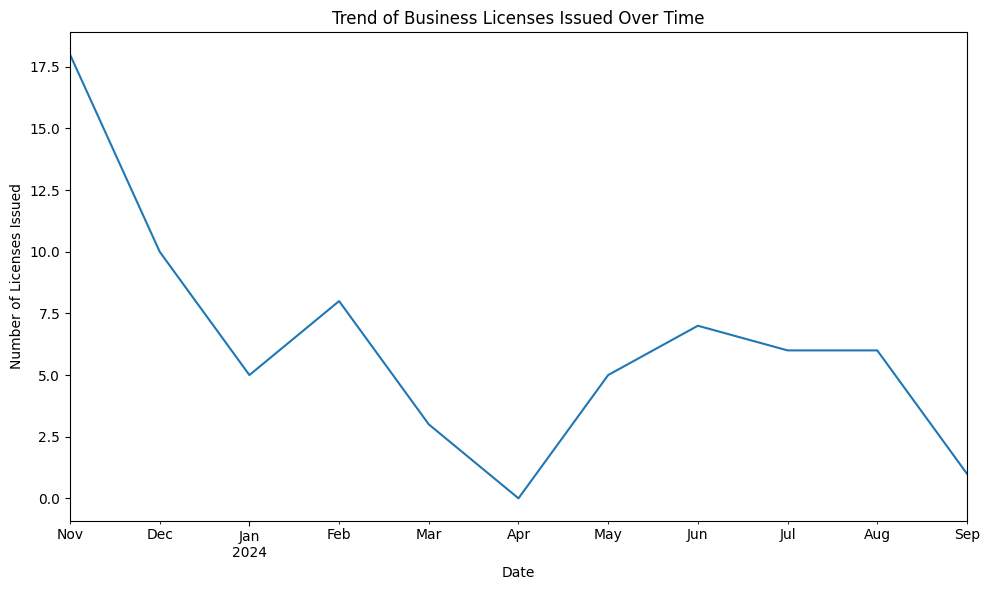

In [10]:
# Create a time series of the number of businesses issued over time
business_data_filtered.set_index('IssuedDate', inplace=True)

# Resample by month to see the trend over time
business_trend_over_time = business_data_filtered.resample('M').size()

# Plot the time trend of issued licenses
plt.figure(figsize=(10, 6))
business_trend_over_time.plot()
plt.title('Trend of Business Licenses Issued Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Licenses Issued')
plt.tight_layout()
plt.show()
